<a href="https://colab.research.google.com/github/ajilmathews05/AJ05/blob/main/exit_test_Ajil_Mathews_20Oct2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROPERTY PRICES PREDICTION

IMPORTING LIBRARIES

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


READING DATASET

In [46]:
df=pd.read_csv('/content/dataset.csv')

In [47]:
df.head()

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,0,1600000000,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,1,850000000,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,2,875000000,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,3,1750000000,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4,4900000000,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


DROPING THE UNNAMED COLUMN

In [48]:
df = df.drop(columns=['Unnamed: 0'])

In [49]:
df.head()

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,1600000000,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,850000000,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,875000000,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,1750000000,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4900000000,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         32536 non-null  int64  
 1   Location      32527 non-null  object 
 2   Bedroom       32536 non-null  int64  
 3   Bathroom      32521 non-null  float64
 4   Carport       32521 non-null  float64
 5   Land          32533 non-null  float64
 6   Building      32527 non-null  float64
 7   Month         32527 non-null  float64
 8   City/Regency  32527 non-null  object 
 9   Latitude      32526 non-null  float64
 10  Longitude     32527 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 2.7+ MB


In [51]:
df.describe()

,Price,Bedroom,Bathroom,Carport,Land,Building,Month,Latitude,Longitude
count,3.253600e+04,32536.000000,32521.000000,32521.000000,32533.000000,32527.000000,32527.000000,32526.000000,32527.000000
mean,2.554932e+09,3.524158,2.527721,1.052120,181.392002,179.397485,8.988533,-6.923486,107.625922
std,1.879994e+09,1.235943,1.074318,0.796993,107.491313,108.516303,0.821016,0.051064,0.075701
min,1.020000e+07,1.000000,1.000000,0.000000,37.000000,37.000000,8.000000,-7.230321,107.434849
25%,1.200000e+09,3.000000,2.000000,0.000000,105.000000,100.000000,8.000000,-6.952981,107.590747
50%,2.000000e+09,3.000000,2.000000,1.000000,147.000000,150.000000,9.000000,-6.931934,107.626218
75%,3.365000e+09,4.000000,3.000000,2.000000,225.000000,235.000000,10.000000,-6.886334,107.659881
max,9.700000e+09,8.000000,7.000000,3.000000,612.000000,585.000000,10.000000,-6.734761,107.886580


FINDING MISSING VALUES

In [52]:
df.isnull().sum()

,0
Price,0
Location,9
Bedroom,0
Bathroom,15
Carport,15
Land,3
Building,9
Month,9
City/Regency,9
Latitude,10


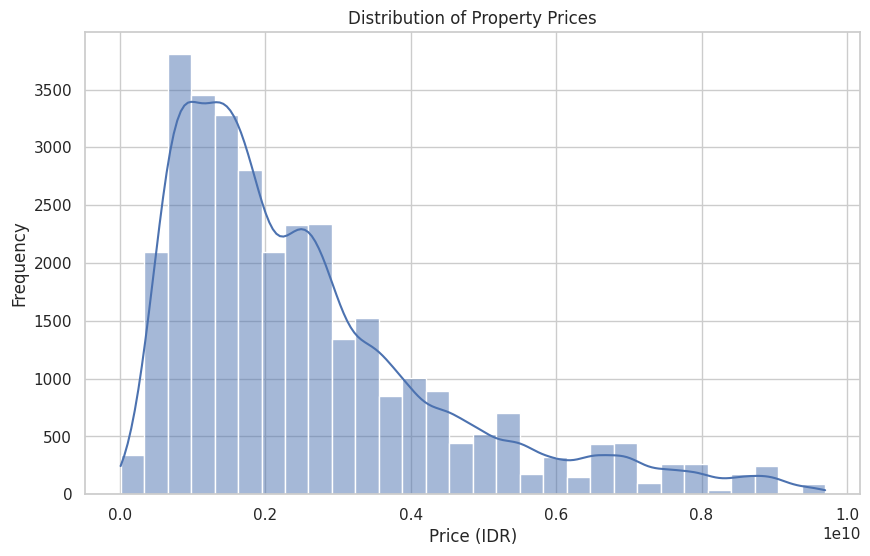

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Property Prices')
plt.xlabel('Price (IDR)')
plt.ylabel('Frequency')
plt.show()

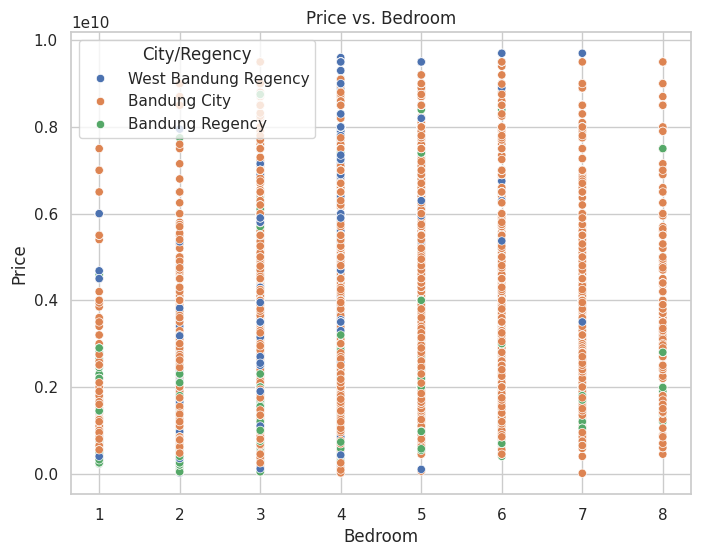

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Bedroom', y='Price', hue='City/Regency')
plt.title('Price vs. Bedroom')
plt.show()

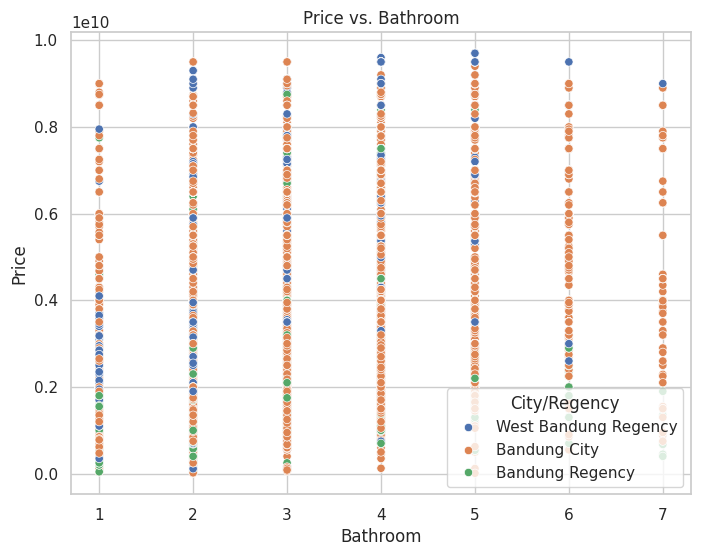

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Bathroom', y='Price', hue='City/Regency')
plt.title('Price vs. Bathroom')
plt.show()

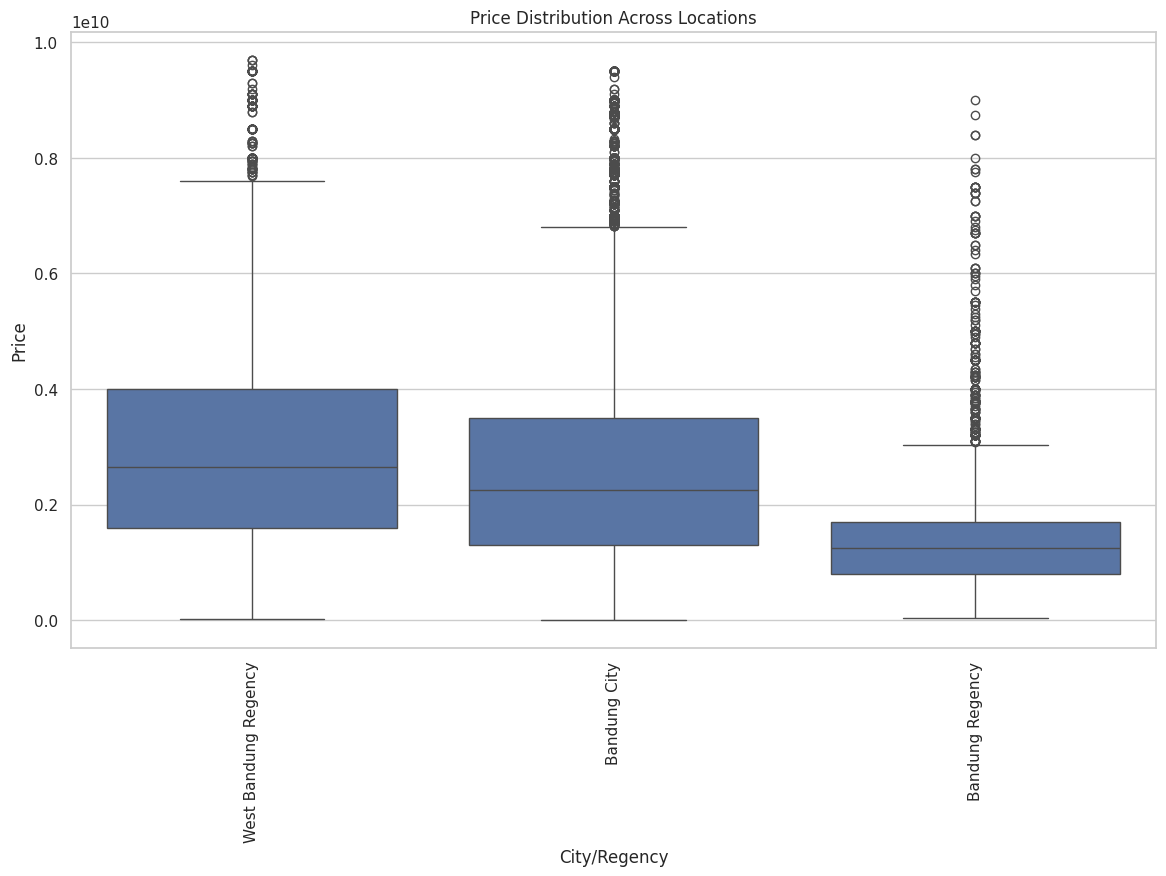

In [58]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='City/Regency', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution Across Locations')
plt.show()

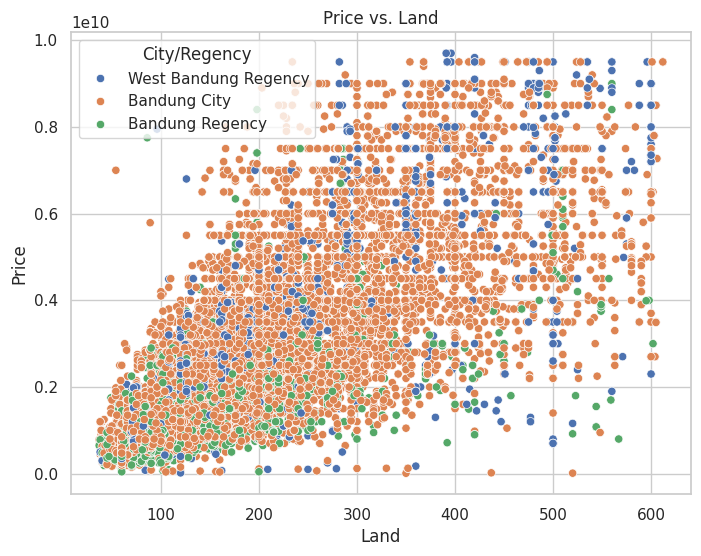

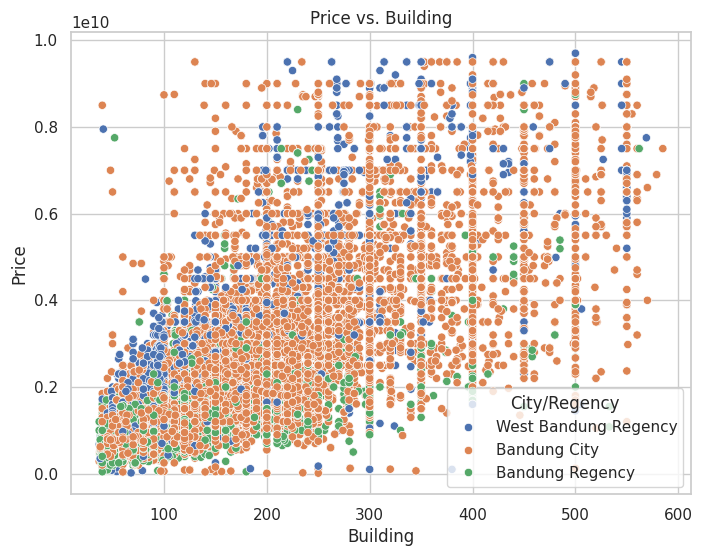

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Land', y='Price', hue='City/Regency')
plt.title('Price vs. Land')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Building', y='Price', hue='City/Regency')
plt.title('Price vs. Building')
plt.show()

Handling missing values


In [12]:
df_1 = df.copy()

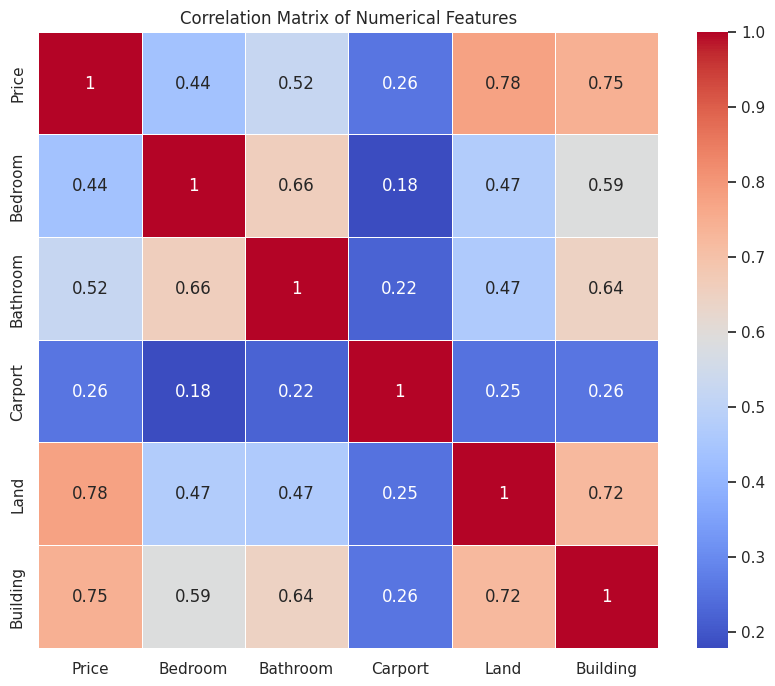

In [105]:
numerical_columns = ['Price', 'Bedroom', 'Bathroom', 'Carport', 'Land', 'Building']
correlation_matrix = df_1[numerical_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Land Size: Larger land areas increase the price, especially in urban locations.

Building Size: Building area also contributes to price but less than land size.

Bedrooms & Bathrooms: The number of bedrooms and bathrooms is positively correlated with price, but the effect diminishes with more rooms.

HANDLING OUTLIERS

In [60]:
def detect_outliers_iqr(df_1, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

COLUMNS NAMED PRICE, LAND AND BUILDING HAS MORE CORRELATION. CHECKING FOR OUTLIERS IN THE SAME

In [61]:
outliers_price = detect_outliers_iqr(df_1, 'Price')
outliers_land = detect_outliers_iqr(df_1, 'Land')
outliers_building = detect_outliers_iqr(df_1, 'Building')

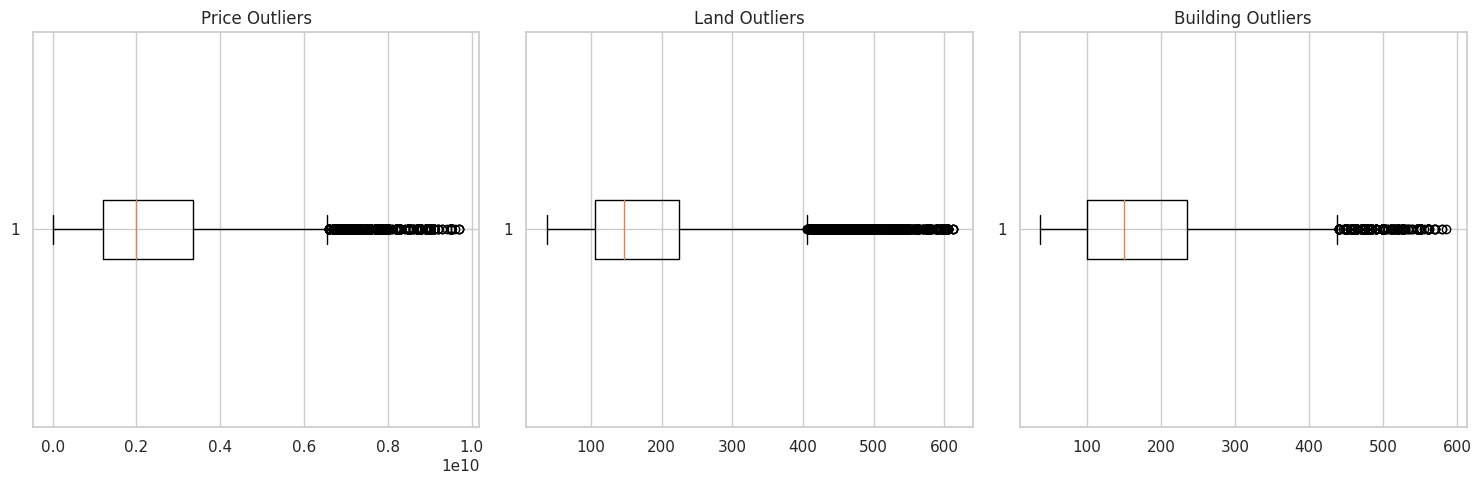

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].boxplot(df_1['Price'], vert=False)
axs[0].set_title('Price Outliers')

axs[1].boxplot(df_1['Land'], vert=False)
axs[1].set_title('Land Outliers')

axs[2].boxplot(df_1['Building'], vert=False)
axs[2].set_title('Building Outliers')

plt.tight_layout()
plt.show()

TOTAL COUNT OF OUTLIER VALUES

In [65]:
outliers_count = {
    "Price": len(outliers_price),
    "Land": len(outliers_land),
    "Building": len(outliers_building)
}
outliers_count

{'Price': 1696, 'Land': 1728, 'Building': 1174}

CAPING THE OUTLIERS

In [68]:
def cap_outliers(df, column):
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

In [69]:
columns_to_cap = ['Price', 'Land', 'Building']

In [72]:
for col in columns_to_cap:
    df_1 = cap_outliers(df_1, col)

APPLYING SIMPLE IMPUTATION

In [73]:
df_1.fillna(df_1.median(numeric_only=True), inplace=True)

In [74]:
numerical_columns = ['Price', 'Bedroom', 'Bathroom', 'Carport', 'Land', 'Building', 'Latitude', 'Longitude']

STANDARD SCALING TO NUMERICAL VALUES

In [67]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()
df_1[numerical_columns] = scaler.fit_transform(df_1[numerical_columns])

SIMPLE IMPUTATIONS TO OTHER COLUMNS

In [77]:
df_1['Bathroom'] = df_1['Bathroom'].fillna(df_1['Bathroom'].median())
df_1['Carport'] = df_1['Carport'].fillna(df_1['Carport'].median())
df_1['Land'] = df_1['Land'].fillna(df_1['Land'].median())
df_1['Building'] = df_1['Building'].fillna(df_1['Building'].median())

In [79]:
print(df_1.head())

      Price         Location   Bedroom  Bathroom   Carport      Land  \
0 -0.509942       Padalarang -1.233137 -1.421816 -0.065152 -1.029650   
1 -0.911712       Parongpong -1.233137 -1.421816 -0.065152 -1.048531   
2 -0.898319        Buah Batu -0.424083 -0.490849 -0.065152 -1.142934   
3 -0.429588      Bojongsoang -1.233137  0.440118 -0.065152 -0.859725   
4  1.257844  Bojongloa Kidul  0.384971  1.371085 -1.320263  0.178708   

   Building  Month  Latitude  Longitude  City/Regency_Bandung Regency  \
0 -1.201640    8.0  1.564563  -1.948899                         False   
1 -0.922254    8.0  2.355241  -0.582983                         False   
2 -1.015383    8.0 -0.823787   0.158353                         False   
3 -0.791874    8.0 -1.379902   0.234636                          True   
4  1.126574    8.0 -0.461212  -0.391878                         False   

   City/Regency_West Bandung Regency  
0                               True  
1                               True  
2          

In [80]:
df_1.isnull().sum()

,0
Price,0
Location,0
Bedroom,0
Bathroom,0
Carport,0
Land,0
Building,0
Month,0
Latitude,0
Longitude,0


LABEL ENCODING

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
label_encoder = LabelEncoder()

In [96]:
categorical_columns = ['Location', 'City/Regency_West Bandung Regency']
for col in categorical_columns:
    df_1[col] = label_encoder.fit_transform(df_1[col].astype(str))

# MODELING THE DATASET

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

LINEAR REGRESSION

In [98]:
X = df_1.drop('Price', axis=1)  # Features (excluding the target 'Price')
y = df_1['Price']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.3024945609947007
R-squared: 0.7040840737631842


# RandomForestRegressor

In [100]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.11657869212304417
R-squared: 0.8859566547390861


COMPARING RANDOM FOREST REGRESSOR WITH OTHER MODELS

In [110]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [102]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)  # Reference model
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'Mean Squared Error': mse, 'R-squared': r2}

# Display the comparison results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"  R-squared: {metrics['R-squared']}")
    print("-" * 40)

Linear Regression:
  Mean Squared Error: 0.3024945609947007
  R-squared: 0.7040840737631842
----------------------------------------
Decision Tree:
  Mean Squared Error: 0.20490273711297707
  R-squared: 0.7995534761290877
----------------------------------------
Support Vector Regressor:
  Mean Squared Error: 0.2886992761001908
  R-squared: 0.7175793395750252
----------------------------------------
Gradient Boosting:
  Mean Squared Error: 0.20938234935717193
  R-squared: 0.7951712862409002
----------------------------------------
Random Forest:
  Mean Squared Error: 0.11657869212304417
  R-squared: 0.8859566547390861
----------------------------------------


### REPORT

*Properties in Bandung City tend to be more expensive than those in West Bandung Regency.

Price Comparisons:

Metric---------------------Bandung City---------------West Bandung Regency

Average Price (IDR)------2.5 billion----------------1.8 billion

Median Price (IDR)	-----2.1 billion	-------------------1.5 billion

Average Land Size (m²)---	200 m²	----------------------300 m²

Average Building Size (m²)---	150 m²----------------	170 m²

# For the Real Estate Company:
1.Focus on Location: Location is the most critical factor affecting property prices. Highlighting the amenities and advantages of certain areas (especially Bandung City) in marketing can justify higher price tags.

2.Target Budget-Friendly Segments: Properties in West Bandung Regency should be marketed as affordable investments with room for value appreciation, especially for buyers with a budget under 1 billion IDR.

3.Diversify Listings: Offering properties that cater to both high-end buyers in Bandung City and more budget-conscious buyers in West Bandung Regency will cover a broader market.

# Property Buyers:
1.Bandung City vs. West Bandung Regency: Buyers should choose between urban convenience and rural space. Those prioritizing space and a lower price point should consider West Bandung Regency, while those seeking urban amenities and potential rental income should look in Bandung City.

2.Investing Under 1 Billion IDR: For buyers with this budget, properties in West Bandung Regency with a larger land area and reasonable access to developing infrastructure are recommended. Look for properties with 2-3 bedrooms, a carport, and future development potential.